In this project, the procedure will be implemented as follows:

* Data preprocessing
* Bernoulli Naive Bayes model construction
* Model built by Scikit Learn
* Cross-validation to evaluate the performance
* Further improvement of two models

## Data Preprossing

In [16]:
#import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction import text
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
import time as t
topic = ['rpg', 'anime', 'datascience', 'hardware', 'cars', 'gamernews', 'gamedev', 'computers']
my_stop_words = text.ENGLISH_STOP_WORDS

#import datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#take a look at the first five rows of the train dataset
train.head()

,body,subreddit
0,As the title says I'm looking for recommendat...,rpg
1,Poor planning. Yeah I can tie together a neat...,rpg
2,I'm actually running (two of) my dream campaig...,rpg
3,In general note that all level-class systems a...,rpg
4,Just posted this review at my blog of the newl...,rpg


In [2]:
#splitting features and target in the dataset
X = pd.DataFrame(train['body'])
Y = pd.DataFrame(train['subreddit'])
X_realtest = pd.DataFrame(test['body'])
data = pd.DataFrame(train)
#converting pandas dataframe to numpy array

X_ = X.to_numpy()
Y_ = Y.to_numpy()
X_realtest_ = X_realtest.to_numpy()

X = X['body'].tolist() 
Y = Y['subreddit'].tolist()
X_realtest = X_realtest['body'].tolist() 
data = train.to_numpy()
X_all = X+X_realtest
maxFeatures = 5000

In [3]:
!Pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
import time as t

/bin/bash: Pip: command not found
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [4]:
# This function sets 1 for all non-zero elements in a vector.
def trans_train(X):
  Z = X
  for i in np.arange(X.shape[0]):
    for j in np.arange(X.shape[1]):
      if X[i,j] != 0:
        Z[i,j] = 1
  return Z

In [5]:
# Defining a lemmatization
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)
class New_LemmaTokenizer:
     def __init__(self):
       self.wnl = WordNetLemmatizer()
     def __call__(self, doc):
       return [self.wnl.lemmatize(t,pos =get_wordnet_pos(t)) for t in word_tokenize(doc) if t.isalpha()]


In [ ]:
#Definina a CounteVectorizer with max features of 500. Removing stop words and words appeared in more than 60% of the sentences.
vectorizer = CountVectorizer(max_features=maxFeatures, stop_words = my_stop_words, tokenizer=New_LemmaTokenizer(),max_df=0.6)
vectorizer.fit(X_all)

Bernoulli Naive Bayes classifier

In [7]:
class NBN():
  def __init__(self, X, Y):
    self.X = X
    self.Y = Y
    self.topic_portion = []
    self.freq_feature = np.zeros((8,self.X.shape[1]))

  def build_NBN(self):
    # this module builds Naive bayes classifier option 1: one classifier for all 8 classes
    topics = np.array([['rpg'], ['anime'], ['datascience'], ['hardware'], ['cars'], ['gamernews'], ['gamedev'], ['computers']])
    each_topic = []
    topic_portion = []

    for topic in topics:
      each_topic.append((sum([i == topic for i in self.Y]))[0])
    self.topic_portion = topic_portion

    i=0
    j=0
    sum_feature = np.zeros((8,self.X.shape[1]))
    freq_feature = np.zeros((8,self.X.shape[1]))
    for count in each_topic:
      sum_feature[i,:] = np.sum(self.X[j:j+count,:],axis=0)
      freq_feature[i,:] = (np.sum(self.X[j:j+count,:],axis=0)+1)/(count+8)
      i=i+1
      j=j+count
     
    self.freq_feature = freq_feature
    #print(freq_feature)
    return topic_portion,freq_feature,topics


  def build_NBN_ovsall(self):
    # this module builds Naive bayes classifier option 2: 8 classifiers (one-vs-all)
    topics = np.array([['rpg'], ['anime'], ['datascience'], ['hardware'], ['cars'], ['gamernews'], ['gamedev'], ['computers']])
    each_topic = []
    topic_portion = []
    n = self.X.shape[0]

    for topic in topics:
      each_topic.append((sum([i == topic for i in self.Y]))[0])
      topic_portion.append((sum([i == topic for i in self.Y])/len(self.Y))[0])
    self.topic_portion = topic_portion

    i=0
    j=0
    sum_feature = np.zeros((8,self.X.shape[1]))
    freq_feature = np.zeros((8,self.X.shape[1]))
    for count in each_topic:
      sum_feature[i,:] = np.sum(self.X[j:j+count,:],axis=0)
      freq_feature[i,:] = (np.sum(self.X[j:j+count,:],axis=0)+1)/(count+2)
      #freq_feature[i,:] = (np.sum(trains[j:j+count,:],axis=0))/(count)
      i=i+1
      j=j+count

    for i in np.arange(len(topics)):
      freq_feature_ = (np.sum(freq_feature,axis=0)-freq_feature[i,:])/(n-each_topic[i])

    self.fraction_theta = np.divide(freq_feature,freq_feature_)
    self.fraction_theta_ = np.divide(1-freq_feature,1-freq_feature_)

    self.freq_feature = freq_feature
    #print(freq_feature)
    return topic_portion,freq_feature,topics


  def predict(self,X):
    # This is the predict function for option 1.
    prob = np.ones((1,8))
    for j in np.arange(X.shape[1]):
        prob = np.multiply(np.multiply(np.power(self.freq_feature[:,j],X[0,j]),np.power(1-self.freq_feature[:,j],1-X[0,j])),prob)
    prob = np.log(np.multiply(self.topic_portion,prob))
    category = np.argmax(prob)
    
    return category

  def predict_ovsall(self,X):
    # This is the predict function for option 2.
    portion = np.array([topic_portion]).T
    prob = np.log(np.divide(portion,(1-portion))) + np.sum(np.add(np.multiply(X,np.log(self.fraction_theta)),np.multiply(1-X,np.log(self.fraction_theta_))),axis=1)

    category = np.argmax(prob)
    
    return category

In [8]:
def Accu_eval(X,Y,topics):
  # This is the accuracy evaluation function for option 1.
  n = X.shape[0]
  result = np.zeros((1,n))
  for i in np.arange(n):
    result[0,i] = NBN1.predict(X[i,:])

  #print(result)

  Y_original = []
  correct = 0
  for i in np.arange(n):
    Y_original.append(topics.tolist().index(Y[i]))
    #Y_original.append(topics.index(Y[i]))
    if topics.tolist().index(Y[i])-result[0,i] == 0:
      
      correct = correct+1

  #print(Y_original)
  return correct/n, result

#accuracy, result = Accu_eval(tests,y_test)
#print(accuracy)

In [9]:
def Accu_eval_ovsall(X,Y,topics):
  # This is the accuracy evaluation function for option 2.
  n = X.shape[0]
  result = np.zeros((1,n))
  for i in np.arange(n):
    result[0,i] = NBN2.predict_ovsall(X[i,:])

  #print(result)

  Y_original = []
  correct = 0
  for i in np.arange(n):
    Y_original.append(topics.tolist().index(Y[i]))
    #Y_original.append(topics.index(Y[i]))
    if topics.tolist().index(Y[i])-result[0,i] == 0:
      
      correct = correct+1

  #print(Y_original)
  return correct/n, result

#accuracy, result = Accu_eval(tests,y_test)
#print(accuracy)

In [ ]:
# Performing 6-fold cross-validation on option 1
kf = KFold(n_splits=6,shuffle=True)
kf.get_n_splits(X_)
print(kf.split(X_))
accuracy = []
X_train_ = []
y_train_ = []
X_test_ = []
y_test_ = []
t_op1 = []


for train_index, test_index in kf.split(X_):

  #print("TRAIN:", train_index, "TEST:", test_index)
  #print(type(train_index))
  #print(train_index.shape[1])
  X_train, X_test = X_[train_index], X_[test_index]
  y_train, y_test = Y_[train_index].tolist(), Y_[test_index].tolist()

  X_train_ = []
  X_test_ = []
  for sentence in X_train:
    X_train_.append(sentence[0])
  for sentence in X_test:
    X_test_.append(sentence[0])

  #print(X_train_[0:5])
  #print(X_train[0:20,0:20])
  #print(y_train[0:20])
  X_train = X_train.tolist()
  #print(X_train[0:20])
  #vectorizer = CountVectorizer(max_features=maxFeatures, stop_words = my_stop_words, tokenizer=LemmaTokenizer())
  #vectorizer = CountVectorizer(max_features=maxFeatures, stop_words = my_stop_words, tokenizer=New_LemmaTokenizer())
  vectors_train = vectorizer.transform(X_train_)
  vectors_test = vectorizer.transform(X_test_)
  print(vectors_train.shape)

  #np.set_printoptions(threshold=np.inf)
  trains = vectors_train.todense()
  tests = vectors_test.todense()

  trains = trans_train(trains)
  tests = trans_train(tests)


  NBN2 = NBN(trains, y_train)
  t1 = t.time()
  topic_portion,freq_feature,topics = NBN2.build_NBN_ovsall()
  #print(topics)
  t2 = t.time()
  t_op1.append(t2-t1)
  accu, result = Accu_eval_ovsall(tests,y_test,topics)
  t3 = t.time()
  t_op1.append(t3-t2)
  accuracy.append(accu)

print('The average accuracy is:')
print(np.mean(accuracy))
print('The times took for training and prediction for each fold:')
print(t_op1)

In [ ]:
# Performing 6-fold cross-validation on option 2
kf = KFold(n_splits=6,shuffle=True)
kf.get_n_splits(X_)
print(kf.split(X_))
accuracy = []
X_train_ = []
y_train_ = []
X_test_ = []
y_test_ = []
t_op2 = []


for train_index, test_index in kf.split(X_):

  #print("TRAIN:", train_index, "TEST:", test_index)
  #print(type(train_index))
  #print(train_index.shape[1])
  X_train, X_test = X_[train_index], X_[test_index]
  y_train, y_test = Y_[train_index].tolist(), Y_[test_index].tolist()

  X_train_ = []
  X_test_ = []
  for sentence in X_train:
    X_train_.append(sentence[0])
  for sentence in X_test:
    X_test_.append(sentence[0])

  #print(X_train_[0:5])
  #print(X_train[0:20,0:20])
  #print(y_train[0:20])
  X_train = X_train.tolist()
  #print(X_train[0:20])
  #vectorizer = CountVectorizer(max_features=maxFeatures, stop_words = my_stop_words, tokenizer=LemmaTokenizer())
  #vectorizer = CountVectorizer(max_features=maxFeatures, stop_words = my_stop_words, tokenizer=New_LemmaTokenizer())
  vectors_train = vectorizer.transform(X_train_)
  vectors_test = vectorizer.transform(X_test_)
  print(vectors_train.shape)

  #np.set_printoptions(threshold=np.inf)
  trains = vectors_train.todense()
  tests = vectors_test.todense()

  trains = trans_train(trains)
  tests = trans_train(tests)

  NBN1 = NBN(trains, y_train)
  t1 = t.time()
  topic_portion,freq_feature,topics = NBN1.build_NBN()
  #print(topics)
  t2 = t.time()
  t_op2.append(t2-t1)
  accu, result = Accu_eval(tests,y_test,topics)
  t3 = t.time()
  t_op2.append(t3-t2)
  accuracy.append(accu)

print('The average accuracy is:')
print(np.mean(accuracy))
print('The times took for training and prediction for each fold:')
print(t_op2)

In [12]:
#Generate predictions for the test set using one-vs-all method.
vectors_alltrain = vectorizer.transform(X)
alltrains = vectors_alltrain.todense()
alltrains = trans_train(alltrains)
NBN2 = NBN(alltrains, Y)
topic_portion,freq_feature,topics = NBN2.build_NBN_ovsall()


vectors_realtest = vectorizer.transform(X_realtest)
realtests = vectors_realtest.todense()
realtests = trans_train(realtests)

n = realtests.shape[0]
result = np.zeros((n,1))
for i in np.arange(n):
  result[i,0] = NBN2.predict(realtests[i,:])
result = result.astype(int)
result_type = []
correct = 0
for i in np.arange(n):
  result_type.append(topics[result[i,0]][0])

print(result_type[0:10])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: divide by zero encountered in log


['datascience', 'anime', 'rpg', 'hardware', 'hardware', 'cars', 'rpg', 'cars', 'gamedev', 'rpg']


In [13]:
# Exporting to csv file.
import csv
id = []
for i in np.arange(n):
  id.append(i)

test_submission = np.array([id,result_type]).T

#np.savetxt("BNB.csv", test_submission, delimiter=",")
with open('BNB.csv','w') as f:
    csv.writer(f).writerows(test_submission)

Artificial Neural Network

In [15]:
# Conducting a grid search over activation layer, hidden layer size and L2 penalty.
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.scorer import make_scorer
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
vectorizer = CountVectorizer(max_features=maxFeatures, stop_words = my_stop_words, tokenizer=New_LemmaTokenizer())
vectorizer.fit(X_all)

train_x, test_x, train_y, test_y = train_test_split(X, Y,test_size=0.2, random_state=10) 
train_x=vectorizer.transform(train_x)
#print(train_x)
test_x=vectorizer.transform(test_x)
#print(test_x)
trains = train_x.todense()
tests = test_x.todense()

trains = trans_train(trains)
tests = trans_train(tests)

MLP = MLPClassifier(random_state=1, max_iter=500,early_stopping=True,solver='adam')
parameters = {'hidden_layer_sizes':[(35),(40),(45),(50),(55)],'alpha':[0.022,0.024,0.026,0.028],'activation':('relu','tanh')}

GS3 = GridSearchCV(MLP, parameters)
GS3.fit(train_x, train_y)
predicted = GS3.predict(test_x)
predicted_train = GS3.predict(train_x)
accu = metrics.accuracy_score(test_y, predicted)
accu_train = metrics.accuracy_score(train_y, predicted_train)
print(metrics.classification_report(test_y, predicted))
print(accu)
print(accu_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['far', 'make', 'u'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


              precision    recall  f1-score   support

       anime       0.95      0.96      0.96       256
        cars       0.92      0.94      0.93       405
   computers       0.76      0.62      0.68        80
 datascience       0.93      0.96      0.94       478
     gamedev       0.87      0.79      0.83       191
   gamernews       0.76      0.80      0.78       152
    hardware       0.85      0.84      0.85       340
         rpg       0.90      0.92      0.91       415

    accuracy                           0.89      2317
   macro avg       0.87      0.85      0.86      2317
weighted avg       0.89      0.89      0.89      2317

0.8942598187311178
0.9767943874797625


In [19]:
# Show the best parameters
print(GS3.best_params_)

{'activation': 'relu', 'alpha': 0.022, 'hidden_layer_sizes': 55}


In [ ]:
# Exporting predition of test set to csv.
vectors_realtest = vectorizer.transform(X_realtest)
realtests = vectors_realtest.todense()
prediction = GS3.predict(realtests)

import csv
id = []
for i in np.arange(2898):
  id.append(i)

test_submission = np.array([id,prediction]).T

#np.savetxt("BNB.csv", test_submission, delimiter=",")
with open('BNB.csv','w') as f:
    csv.writer(f).writerows(test_submission)

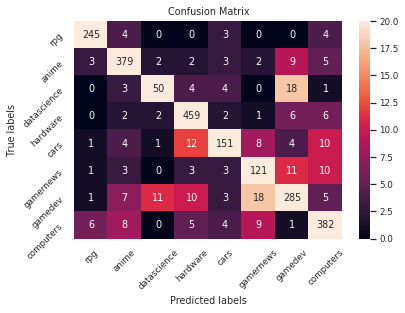

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.set(font_scale=0.8)
cm = confusion_matrix(test_y, predicted)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,vmin=0, vmax=20,fmt='d'); #annot=True to annotate cells
# labels, title and ticks
#ax.figsize(15,15)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')  
ax.xaxis.set_ticklabels(['rpg', 'anime', 'datascience', 'hardware', 'cars', 'gamernews', 'gamedev', 'computers'])
ax.yaxis.set_ticklabels(['rpg', 'anime', 'datascience', 'hardware', 'cars', 'gamernews', 'gamedev', 'computers'])
ax.tick_params(axis ='x', rotation = 45)
ax.tick_params(axis ='y', rotation = 45)